In [1]:
import src.data_acquisition as da

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [4]:
df=da.getStablePoolHistory(10000000)

In [5]:
df

,date,tvlUSD,volumeUSD,feesUSD,pool_id,pool_name
0,2021-05-24,4.038929e+05,1.560326e+05,78.016302,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
1,2021-05-25,6.273335e+05,1.641681e+06,820.840475,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
2,2021-05-26,6.411043e+05,1.581438e+05,79.071880,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
3,2021-05-27,6.411378e+05,6.312746e+04,31.563732,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
4,2021-05-28,5.229501e+05,3.004094e+05,150.204708,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
...,...,...,...,...,...,...
2285,2022-10-23,3.372380e+07,2.216237e+06,1108.118424,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05
2286,2022-10-24,2.618394e+07,2.538254e+06,1269.126821,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05
2287,2022-10-25,2.600926e+07,1.227828e+07,6139.141500,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05
2288,2022-10-26,2.752146e+07,8.948885e+06,4474.442746,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05


In [6]:
df['returns']=df.feesUSD/df.tvlUSD

In [7]:
start_date=df[df.pool_name=='USDC_USDT_01'].date.min()

In [8]:
current_env=df[df.date>start_date].reset_index(drop=True)

In [9]:
current_env.groupby('pool_name').returns.mean()*365

pool_name
BUSD_USDC_05    0.013155
DAI_USDC_01     0.018109
DAI_USDC_05     0.004481
USDC_USDT_01    0.022022
USDC_USDT_05    0.042200
Name: returns, dtype: float64

In [10]:
current_env.groupby('pool_name').agg({'returns':['mean','std']})

returns          
                  mean       std
pool_name                       
BUSD_USDC_05  0.000036  0.000144
DAI_USDC_01   0.000050  0.000159
DAI_USDC_05   0.000012  0.000026
USDC_USDT_01  0.000060  0.000050
USDC_USDT_05  0.000116  0.000283

In [11]:
def returnsColumn(gb_tupple):
    pool_name,frame=gb_tupple
    series=frame.sort_values('date',ascending=True).returns.reset_index(drop=True)
    series.name=pool_name
    return series

In [12]:
pd.concat([returnsColumn(tupple) for tupple in current_env.groupby('pool_name')],axis=1)

,BUSD_USDC_05,DAI_USDC_01,DAI_USDC_05,USDC_USDT_01,USDC_USDT_05
0,0.000092,1.464387e-04,8.987138e-05,7.997535e-05,4.254133e-05
1,0.000285,2.324156e-04,4.994879e-05,4.357541e-04,1.212978e-04
2,0.000179,2.042541e-03,1.749659e-04,5.184025e-04,1.791698e-04
3,0.000090,5.771580e-04,6.647771e-05,1.027888e-04,4.760556e-05
4,0.000270,8.629311e-04,3.538135e-05,9.409775e-05,9.424827e-05
...,...,...,...,...,...
343,NaN,5.358963e-07,4.574351e-08,3.482003e-05,3.285865e-05
344,NaN,4.447667e-06,7.473686e-07,6.015972e-05,4.846967e-05
345,NaN,3.152403e-06,1.956633e-05,6.938687e-05,2.360368e-04
346,NaN,3.043726e-06,5.297879e-06,4.410245e-05,1.625801e-04


In [13]:
busd=current_env[current_env.pool_name=='BUSD_USDC_05'].copy()

In [14]:
busd_range=pd.date_range(busd.date.min(),busd.date.max())
len(busd_range[~busd_range.isin(busd.date)])

14

In [15]:
busd_missing=busd_range[~busd_range.isin(busd.date)].to_frame().reset_index(drop=True)
busd_missing.columns=['date']
busd_missing['pool_name']='BUSD_USDC_05'
busd_missing['returns']=0
current_env_clean=pd.concat([current_env[['date','pool_name','returns']],busd_missing]).reset_index(drop=True)

In [16]:
returns_df=pd.concat([returnsColumn(tupple) for tupple in current_env_clean.groupby('pool_name')],axis=1)

In [17]:
returns_df

,BUSD_USDC_05,DAI_USDC_01,DAI_USDC_05,USDC_USDT_01,USDC_USDT_05
0,9.206241e-05,1.464387e-04,8.987138e-05,7.997535e-05,4.254133e-05
1,2.848186e-04,2.324156e-04,4.994879e-05,4.357541e-04,1.212978e-04
2,1.792331e-04,2.042541e-03,1.749659e-04,5.184025e-04,1.791698e-04
3,9.001985e-05,5.771580e-04,6.647771e-05,1.027888e-04,4.760556e-05
4,2.701912e-04,8.629311e-04,3.538135e-05,9.409775e-05,9.424827e-05
...,...,...,...,...,...
343,1.446368e-06,5.358963e-07,4.574351e-08,3.482003e-05,3.285865e-05
344,4.155201e-07,4.447667e-06,7.473686e-07,6.015972e-05,4.846967e-05
345,2.218122e-05,3.152403e-06,1.956633e-05,6.938687e-05,2.360368e-04
346,1.295217e-08,3.043726e-06,5.297879e-06,4.410245e-05,1.625801e-04


In [18]:
returns_df.corr()

,BUSD_USDC_05,DAI_USDC_01,DAI_USDC_05,USDC_USDT_01,USDC_USDT_05
BUSD_USDC_05,1.000000,0.254401,0.180543,0.099297,0.162151
DAI_USDC_01,0.254401,1.000000,0.470106,0.464662,0.049896
DAI_USDC_05,0.180543,0.470106,1.000000,0.350665,0.452682
USDC_USDT_01,0.099297,0.464662,0.350665,1.000000,0.121005
USDC_USDT_05,0.162151,0.049896,0.452682,0.121005,1.000000


In [20]:
import src.portfolio_weight_simulation as ws

In [21]:
results=ws.run(returns_df,100000)

In [22]:
def annualize(results_df):
    results_df['annual_returns']=results_df.daily_return*365
    results_df['annual_std']=results_df.daily_std*365**(1/2)

In [23]:
annualize(results)

In [24]:
identity=np.matrix(np.identity(5))

In [27]:
identity_matrix=np.matrix(np.identity(5))
base_case=ws.run(returns_df,identity_matrix)

In [28]:
annualize(base_case)

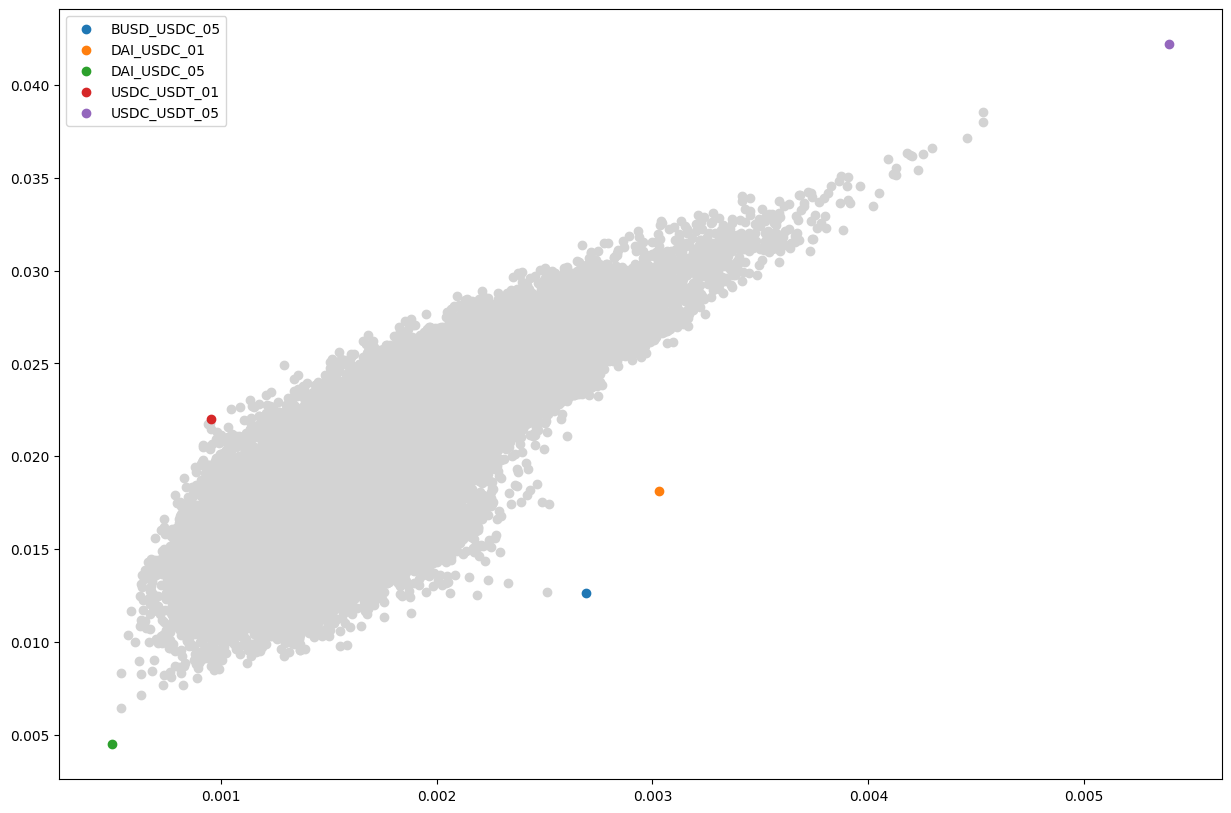

In [29]:
plt.scatter(results.annual_std,results.annual_returns,color='lightgrey')
for index, row in base_case.iterrows():
    pool_name=base_case.columns[index]
    plt.scatter([row.annual_std],[row.annual_returns],label=pool_name)
_=plt.legend()